# Perceptron (XOR)

[0 0]: -0.0010968634060864457 -> 0
[0 1]: 0.4362722541879846 -> 1
[1 0]: 0.554984135943851 -> 1
[1 1]: 0.992353253537922 -> 1


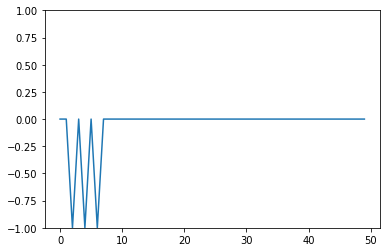

In [14]:
from random import choice
from numpy import array, dot, random

unit_step = lambda x: 0 if x < 0 else 1

training_data = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 1), ]

w = random.rand(3)

errors = []
eta = 0.2 
n = 50

for i in range(n):
    x, expected = choice(training_data)
    result = dot(w, x)
    error = expected - unit_step(result)
    errors.append(error)
    w += eta * error * x

for x, _ in training_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))
    
from pylab import plot, ylim, show
ylim([-1,1]) 
plot(errors)
show()

In [15]:
import math
import numpy
import random

# note that this only works for a single layer of depth
INPUT_NODES = 2
OUTPUT_NODES = 1
HIDDEN_NODES = 2

# 15000 iterations is a good point for playing with learning rate
MAX_ITERATIONS = 150000

# setting this too low makes everything change very slowly, but too high
# makes it jump at each and every example and oscillate. I found .5 to be good
LEARNING_RATE = .2

print("Neural Network Program")

class network:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.total_nodes = input_nodes + hidden_nodes + output_nodes
        self.learning_rate = learning_rate

        # set up the arrays
        self.values = numpy.zeros(self.total_nodes)
        self.expectedValues = numpy.zeros(self.total_nodes)
        self.thresholds = numpy.zeros(self.total_nodes)

        # the weight matrix is always square
        self.weights = numpy.zeros((self.total_nodes, self.total_nodes))

        # set random seed! this is so we can experiment consistently
        random.seed(10000)

        # set initial random values for weights and thresholds
        # this is a strictly upper triangular matrix as there is no feedback
        # loop and there inputs do not affect other inputs
        for i in range(self.input_nodes, self.total_nodes):
            self.thresholds[i] = random.random() / random.random()
            for j in range(i + 1, self.total_nodes):
                self.weights[i][j] = random.random() * 2

    def process(self):
        # update the hidden nodes
        for i in range(self.input_nodes, self.input_nodes + self.hidden_nodes):
            # sum weighted input nodes for each hidden node, compare threshold, apply sigmoid
            W_i = 0.0
            for j in range(self.input_nodes):
                W_i += self.weights[j][i] * self.values[j]
            W_i -= self.thresholds[i]
            self.values[i] = 1 / (1 + math.exp(-W_i))

        # update the output nodes
        for i in range(self.input_nodes + self.hidden_nodes, self.total_nodes):
            # sum weighted hidden nodes for each output node, compare threshold, apply sigmoid
            W_i = 0.0
            for j in range(self.input_nodes, self.input_nodes + self.hidden_nodes):
                W_i += self.weights[j][i] * self.values[j]
            W_i -= self.thresholds[i]
            self.values[i] = 1 / (1 + math.exp(-W_i))

    def processErrors(self):
        sumOfSquaredErrors = 0.0

        # we only look at the output nodes for error calculation
        for i in range(self.input_nodes + self.hidden_nodes, self.total_nodes):
            error = self.expectedValues[i] - self.values[i]
            #print error
            sumOfSquaredErrors += math.pow(error, 2)
            outputErrorGradient = self.values[i] * (1 - self.values[i]) * error
            #print outputErrorGradient

            # now update the weights and thresholds
            for j in range(self.input_nodes, self.input_nodes + self.hidden_nodes):
                # first update for the hidden nodes to output nodes (1 layer)
                delta = self.learning_rate * self.values[j] * outputErrorGradient
                #print delta
                self.weights[j][i] += delta
                hiddenErrorGradient = self.values[j] * (1 - self.values[j]) * outputErrorGradient * self.weights[j][i]

                # and then update for the input nodes to hidden nodes
                for k in range(self.input_nodes):
                    delta = self.learning_rate * self.values[k] * hiddenErrorGradient
                    self.weights[k][j] += delta

                # update the thresholds for the hidden nodes
                delta = self.learning_rate * -1 * hiddenErrorGradient
                #print delta
                self.thresholds[j] += delta

            # update the thresholds for the output node(s)
            delta = self.learning_rate * -1 * outputErrorGradient
            self.thresholds[i] += delta
        return sumOfSquaredErrors

class sampleMaker:
    def __init__(self, network):
        self.counter = 0
        self.network = network

    def setXor(self, x):
        if x == 0:
            self.network.values[0] = 1
            self.network.values[1] = 1
            self.network.expectedValues[4] = 0
        elif x == 1:
            self.network.values[0] = 0
            self.network.values[1] = 1
            self.network.expectedValues[4] = 1
        elif x == 2:
            self.network.values[0] = 1
            self.network.values[1] = 0
            self.network.expectedValues[4] = 1
        else:
            self.network.values[0] = 0
            self.network.values[1] = 0
            self.network.expectedValues[4] = 0

    def setNextTrainingData(self):
        self.setXor(self.counter % 4)
        self.counter += 1

# start of main program loop, initialize classes
net = network(INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, LEARNING_RATE)
samples = sampleMaker(net)

for i in range(MAX_ITERATIONS):
    samples.setNextTrainingData()
    net.process()
    error = net.processErrors()

    # prove that we got the right answers(ish)!
    if i > (MAX_ITERATIONS - 5):
        output = (net.values[0], net.values[1], net.values[4], net.expectedValues[4], error)
        print(output)

# display final parameters
print("---------------Net weights-------------")
print(net.weights)
print(net.thresholds)

Neural Network Program
(1.0, 1.0, 0.014929208005738348, 0.0, 0.000222881251678602)
(0.0, 1.0, 0.98572950473676912, 1.0, 0.00020364703505789487)
(1.0, 0.0, 0.98562503368714638, 1.0, 0.00020663965649567642)
(0.0, 0.0, 0.016607849913409585, 0.0, 0.0002758206787463388)
---------------Net weights-------------
[[ 0.          0.          5.75231929 -6.31595212  0.        ]
 [ 0.          0.         -5.97540997  6.18899346  0.        ]
 [ 0.          0.          0.          1.93019719  9.6814855 ]
 [ 0.          0.          0.          0.          9.57128428]
 [ 0.          0.          0.          0.          0.        ]]
[ 0.          0.          3.1933078   3.44466182  4.75885176]


In [17]:
#################################################################################
### Feed forward three layer, Artificial Neural Network in Google Tensor Flow ###
### Illustrates the learning of XOR logic with two activation functions       ###
### 									      ###	
### Shows the ability to cope with noisy data and still learn patterns        ###
### Usage: {Activation: Sigmoidal, Cost: [ACE, MSE]}                          ### 
###        {Activation: Tanh, Cost: [MSE]}                                    ### 
### 									      ### 
### Copyright Brett 2016                                                      ### 
#################################################################################


import tensorflow as tf
import numpy as np

def rand01(digit):
    # Add some random noise to bits, but keep always between 0 and 1
    s = abs(np.random.normal(0.0, 0.05))
    if digit == 0:
        noise = digit + s
    else:
        noise = digit - s
    return noise

### Training Examples
### All combinations of XOR

X = [[0, 0],[0, 1],[1, 0],[1, 1]]
Y = [[0], [1], [1], [0]]

# Add some random noise to our inputs. Useful if we use the tanh activiation function

add_noise = np.vectorize(rand01)  
X = add_noise(X)
Y = add_noise(Y)

# Neural Network Parameters

N_STEPS = 200000
N_EPOCH = 5000
N_TRAINING = len(X)

N_INPUT_NODES = 2
N_HIDDEN_NODES = 5
N_OUTPUT_NODES  = 1
ACTIVATION = 'tanh' # sigmoid or tanh
COST = 'ACE' # MSE or ACE
LEARNING_RATE = 0.05

if __name__ == '__main__':

    ##############################################################################
    ### Create placeholders for variables and define Neural Network structure  ###
    ### Feed forward 3 layer, Neural Network.                                  ###
    


    x_ = tf.placeholder(tf.float32, shape=[N_TRAINING, N_INPUT_NODES], name="x-input")
    y_ = tf.placeholder(tf.float32, shape=[N_TRAINING, N_OUTPUT_NODES], name="y-input")

    theta1 = tf.Variable(tf.random_uniform([N_INPUT_NODES,N_HIDDEN_NODES], -1, 1), name="theta1")
    theta2 = tf.Variable(tf.random_uniform([N_HIDDEN_NODES,N_OUTPUT_NODES], -1, 1), name="theta2")

    bias1 = tf.Variable(tf.zeros([N_HIDDEN_NODES]), name="bias1")
    bias2 = tf.Variable(tf.zeros([N_OUTPUT_NODES]), name="bias2")


    if ACTIVATION == 'sigmoid':

        ### Use a sigmoidal activation function ###

        layer1 = tf.sigmoid(tf.matmul(x_, theta1) + bias1)
        output = tf.sigmoid(tf.matmul(layer1, theta2) + bias2)

    else:
        ### Use tanh activation function ###

        layer1 = tf.tanh(tf.matmul(x_, theta1) + bias1)
        output = tf.tanh(tf.matmul(layer1, theta2) + bias2)
    
        output = tf.add(output, 1)
        output = tf.multiply(output, 0.5)

    
    if COST == "MSE":

        # Mean Squared Estimate - the simplist cost function (MSE)

        cost = tf.reduce_mean(tf.square(Y - output)) 
        train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cost)
    
    else:
        # Average Cross Entropy - better behaviour and learning rate

        
        cost = - tf.reduce_mean( (y_ * tf.log(output)) + (1 - y_) * tf.log(1.0 - output)  )
        train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cost)



    # init = tf.initialize_all_variables()
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)


    for i in range(N_STEPS):
        sess.run(train_step, feed_dict={x_: X, y_: Y})
        if i % N_EPOCH == 0:
            print('Batch ', i)
            print('Inference ', sess.run(output, feed_dict={x_: X, y_: Y}))
            print('Cost ', sess.run(cost, feed_dict={x_: X, y_: Y}))
            #print('op: ', sess.run(output))

Batch  0
Inference  [[ 0.47944266]
 [ 0.93536353]
 [ 0.91219008]
 [ 0.98289716]]
Cost  1.21381
Batch  5000
Inference  [[ 0.00189799]
 [ 0.97749209]
 [ 0.87864375]
 [ 0.09099805]]
Cost  0.198023
Batch  10000
Inference  [[ 0.00159177]
 [ 0.97771674]
 [ 0.87882936]
 [ 0.09085816]]
Cost  0.198015
Batch  15000
Inference  [[ 0.00156406]
 [ 0.97773504]
 [ 0.87884521]
 [ 0.09084859]]
Cost  0.198015
Batch  20000
Inference  [[ 0.00156289]
 [ 0.97773468]
 [ 0.87884521]
 [ 0.09084916]]
Cost  0.198015
Batch  25000
Inference  [[ 0.00156289]
 [ 0.97773468]
 [ 0.87884521]
 [ 0.09084916]]
Cost  0.198015
Batch  30000
Inference  [[ 0.00156289]
 [ 0.97773468]
 [ 0.87884521]
 [ 0.09084916]]
Cost  0.198015
Batch  35000
Inference  [[ 0.00156289]
 [ 0.97773468]
 [ 0.87884521]
 [ 0.09084916]]
Cost  0.198015
Batch  40000
Inference  [[ 0.00156289]
 [ 0.97773468]
 [ 0.87884521]
 [ 0.09084916]]
Cost  0.198015
Batch  45000
Inference  [[ 0.00156289]
 [ 0.97773468]
 [ 0.87884521]
 [ 0.09084916]]
Cost  0.198015
Batch 